In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/Users/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
series = read_csv('water.csv', header=0, index_col=0, parse_dates=True)

In [3]:
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


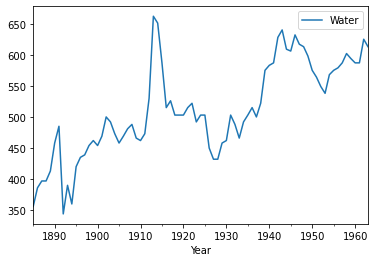

In [4]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Water'}>]], dtype=object)

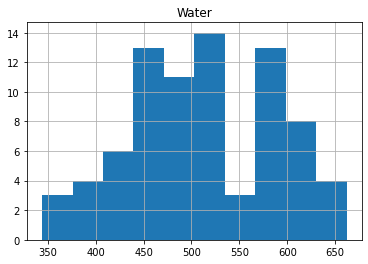

In [36]:
series.hist()

<AxesSubplot:ylabel='Density'>

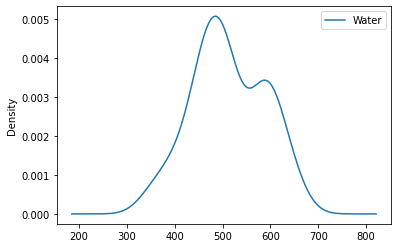

In [37]:
series.plot(kind='kde')

In [38]:
# separate out a validation dataset
split_point = len(series) - 10
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 69, Validation 10


#### Persistence/ Base model

In [39]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]


In [40]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Observed =%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=503.000, Observed =503.000
>Predicted=503.000, Observed =503.000
>Predicted=503.000, Observed =515.000
>Predicted=515.000, Observed =522.000
>Predicted=522.000, Observed =492.000
>Predicted=492.000, Observed =503.000
>Predicted=503.000, Observed =503.000
>Predicted=503.000, Observed =450.000
>Predicted=450.000, Observed =432.000
>Predicted=432.000, Observed =432.000
>Predicted=432.000, Observed =458.000
>Predicted=458.000, Observed =462.000
>Predicted=462.000, Observed =503.000
>Predicted=503.000, Observed =488.000
>Predicted=488.000, Observed =466.000
>Predicted=466.000, Observed =492.000
>Predicted=492.000, Observed =503.000
>Predicted=503.000, Observed =515.000
>Predicted=515.000, Observed =500.000
>Predicted=500.000, Observed =522.000
>Predicted=522.000, Observed =575.000
>Predicted=575.000, Observed =583.000
>Predicted=583.000, Observed =587.000
>Predicted=587.000, Observed =628.000
>Predicted=628.000, Observed =640.000
>Predicted=640.000, Observed =609.000
>Predicted=6

#### ARIMA Hyperparameters

In [5]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [6]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [7]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.346
ARIMA(0, 1, 0) RMSE=22.311
ARIMA(0, 1, 1) RMSE=22.258
ARIMA(0, 1, 2) RMSE=28.430
ARIMA(0, 1, 3) RMSE=30.054
ARIMA(0, 1, 4) RMSE=30.029
ARIMA(0, 2, 0) RMSE=29.335
ARIMA(0, 2, 1) RMSE=23.072
ARIMA(0, 2, 2) RMSE=22.954
ARIMA(1, 0, 0) RMSE=23.958
ARIMA(1, 0, 1) RMSE=23.998
ARIMA(1, 0, 2) RMSE=25.412
ARIMA(1, 0, 3) RMSE=29.214
ARIMA(1, 1, 0) RMSE=22.270
ARIMA(1, 2, 0) RMSE=27.786
ARIMA(1, 2, 1) RMSE=22.979
ARIMA(2, 0, 0) RMSE=24.131
ARIMA(2, 0, 1) RMSE=24.140
ARIMA(2, 1, 0) RMSE=22.084
ARIMA(2, 2, 0) RMSE=25.616
ARIMA(3, 0, 0) RMSE=24.183
ARIMA(3, 0, 1) RMSE=25.196
ARIMA(3, 1, 0) RMSE=25.060
ARIMA(3, 1, 1) RMSE=32.092
ARIMA(3, 2, 0) RMSE=26.126
ARIMA(3, 2, 1) RMSE=25.594
ARIMA(4, 0, 0) RMSE=25.113
ARIMA(4, 0, 1) RMSE=25.174
ARIMA(4, 1, 0) RMSE=26.213
ARIMA(4, 1, 1) RMSE=31.097
ARIMA(4, 1, 2) RMSE=32.341
ARIMA(4, 2, 0) RMSE=27.798
ARIMA(4, 2, 1) RMSE=26.394
ARIMA(4, 2, 2) RMSE=27.394
Best ARIMA(2, 1, 0) RMSE=22.084


#### Build Model based on the optimized values

In [18]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [19]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

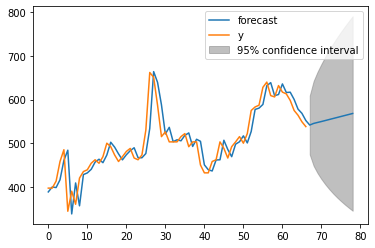

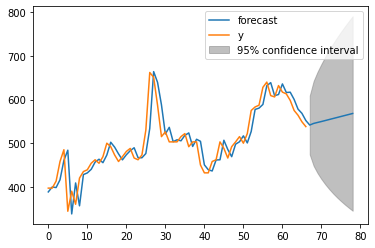

In [20]:
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [21]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

40.37707970944942

#### Combine train and test data and build final model

In [22]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [23]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

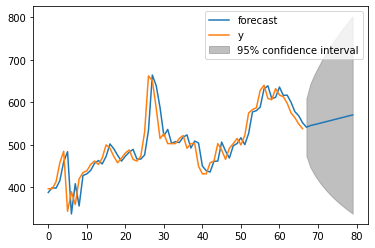

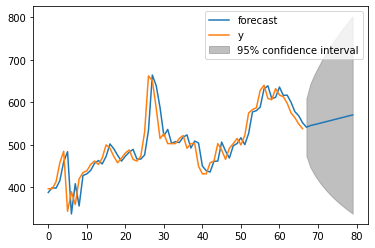

In [27]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [28]:
forecast

array([541.53939838, 545.26170412, 547.49332076, 549.64507837,
       551.94717172, 554.26364697, 556.56521988, 558.86470092,
       561.16563192, 563.46683781])